# Load Libraries and Data 

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.stats import pearsonr

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [2]:
demo = pd.read_excel('C:/Users/angad/Desktop/ANGAD/DISSERTATION/Telco_customer_churn_demographics.xlsx')
status = pd.read_excel('C:/Users/angad/Desktop/ANGAD/DISSERTATION/Telco_customer_churn_status.xlsx')
services = pd.read_excel('C:/Users/angad/Desktop/ANGAD/DISSERTATION/Telco_customer_churn_services.xlsx')

In [3]:
df = pd.merge(demo, services).merge(status)

print(df.shape)
df.head()

(7043, 45)


,Customer ID,Count,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Quarter,...,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,1,Male,78,No,Yes,No,No,0,Q3,...,0.00,59.65,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,1,Female,74,No,Yes,Yes,Yes,1,Q3,...,390.80,1024.10,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,1,Male,71,No,Yes,No,Yes,3,Q3,...,203.94,1910.88,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,1,Female,78,No,Yes,Yes,Yes,1,Q3,...,494.00,2995.07,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,1,Female,80,No,Yes,Yes,Yes,1,Q3,...,234.21,3102.36,2,Churned,Yes,1,67,2793,Price,Extra data charges


In [4]:
df.dtypes

Customer ID                           object
Count                                  int64
Gender                                object
Age                                    int64
Under 30                              object
Senior Citizen                        object
Married                               object
Dependents                            object
Number of Dependents                   int64
Quarter                               object
Referred a Friend                     object
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download                int64
Online Security                       object
Online Backup                         object
Device Pro

In [5]:
df.isna().sum()

Customer ID                             0
Count                                   0
Gender                                  0
Age                                     0
Under 30                                0
Senior Citizen                          0
Married                                 0
Dependents                              0
Number of Dependents                    0
Quarter                                 0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                           0
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                           0
Device Protection Plan                  0
Premium Tech Support              

In [6]:
df['Satisfaction Score'] = df['Satisfaction Score'].astype("object")
df['Number of Dependents'] = df['Number of Dependents'].astype("object")

## Split Features

In [7]:
cat_variables = df[['Gender', 'Married', 'Number of Dependents','Offer', 'Phone Service', 
                    'Multiple Lines', 'Internet Service', 'Online Security', 
                    'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 
                    'Streaming TV', 'Streaming Movies', 'Contract', 'Payment Method', 'Satisfaction Score']]

print(cat_variables.shape)
cat_variables.head()

(7043, 16)


,Gender,Married,Number of Dependents,Offer,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Contract,Payment Method,Satisfaction Score
0,Male,No,0,None,No,No,Yes,No,No,Yes,No,No,Yes,Month-to-Month,Bank Withdrawal,3
1,Female,Yes,1,Offer E,Yes,Yes,Yes,No,Yes,No,No,No,No,Month-to-Month,Credit Card,3
2,Male,No,3,Offer D,Yes,Yes,Yes,No,No,No,No,Yes,Yes,Month-to-Month,Bank Withdrawal,2
3,Female,Yes,1,Offer C,Yes,No,Yes,No,Yes,Yes,No,Yes,Yes,Month-to-Month,Bank Withdrawal,2
4,Female,Yes,1,Offer C,Yes,Yes,Yes,No,No,No,No,No,No,Month-to-Month,Bank Withdrawal,2


In [8]:
num_variables = df[['Age', 'Tenure in Months', 'Monthly Charge', 'Total Charges', 'CLTV', 'Total Revenue']]

print(num_variables.shape)
num_variables.head()

(7043, 6)


,Age,Tenure in Months,Monthly Charge,Total Charges,CLTV,Total Revenue
0,78,1,39.65,39.65,5433,59.65
1,74,8,80.65,633.30,5302,1024.10
2,71,18,95.45,1752.55,3179,1910.88
3,78,25,98.50,2514.50,5337,2995.07
4,80,37,76.50,2868.15,2793,3102.36


In [9]:
#Dependent Variables
churn_value = df['Churn Value']
churn_value

0       1
1       1
2       1
3       1
4       1
       ..
7038    0
7039    0
7040    0
7041    0
7042    0
Name: Churn Value, Length: 7043, dtype: int64

# Exploratory Data Analysis

In [10]:
df['Churn Value'].value_counts()

0    5174
1    1869
Name: Churn Value, dtype: int64

In [11]:
round(df['Churn Value'].value_counts(normalize=True), 2)

0    0.73
1    0.27
Name: Churn Value, dtype: float64

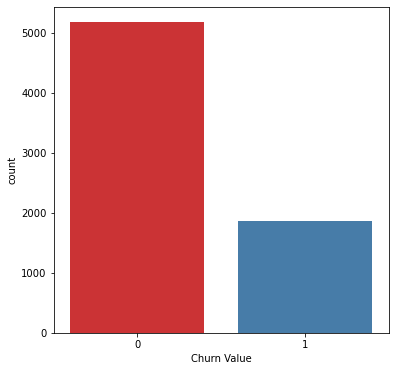

In [12]:
#We can also visualize the count for each category using a countplot
plt.figure(figsize=(6,6))
sns.countplot(x = 'Churn Value', data = df, palette = "Set1")

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "20"

Maximum Churn Score: 96
Minimum Churn Score: 5


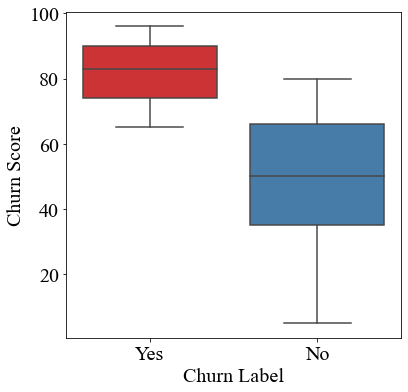

In [13]:
print("Maximum Churn Score:", df['Churn Score'].max())
print("Minimum Churn Score:", df['Churn Score'].min())
plt.figure(figsize=(6, 6))
sns.boxplot(y = df['Churn Score'], x = df['Churn Label'], palette= "Set1")

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "20"

plt.show()

## Univariate Analysis

### Categorical Variables

In [14]:
cat_variables.describe()

,Gender,Married,Number of Dependents,Offer,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Contract,Payment Method,Satisfaction Score
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,10,6,2,2,2,2,2,2,2,2,2,3,3,5
top,Male,No,0,None,Yes,No,Yes,No,No,No,No,No,No,Month-to-Month,Bank Withdrawal,3
freq,3555,3641,5416,3877,6361,4072,5517,5024,4614,4621,4999,4336,4311,3610,3909,2665


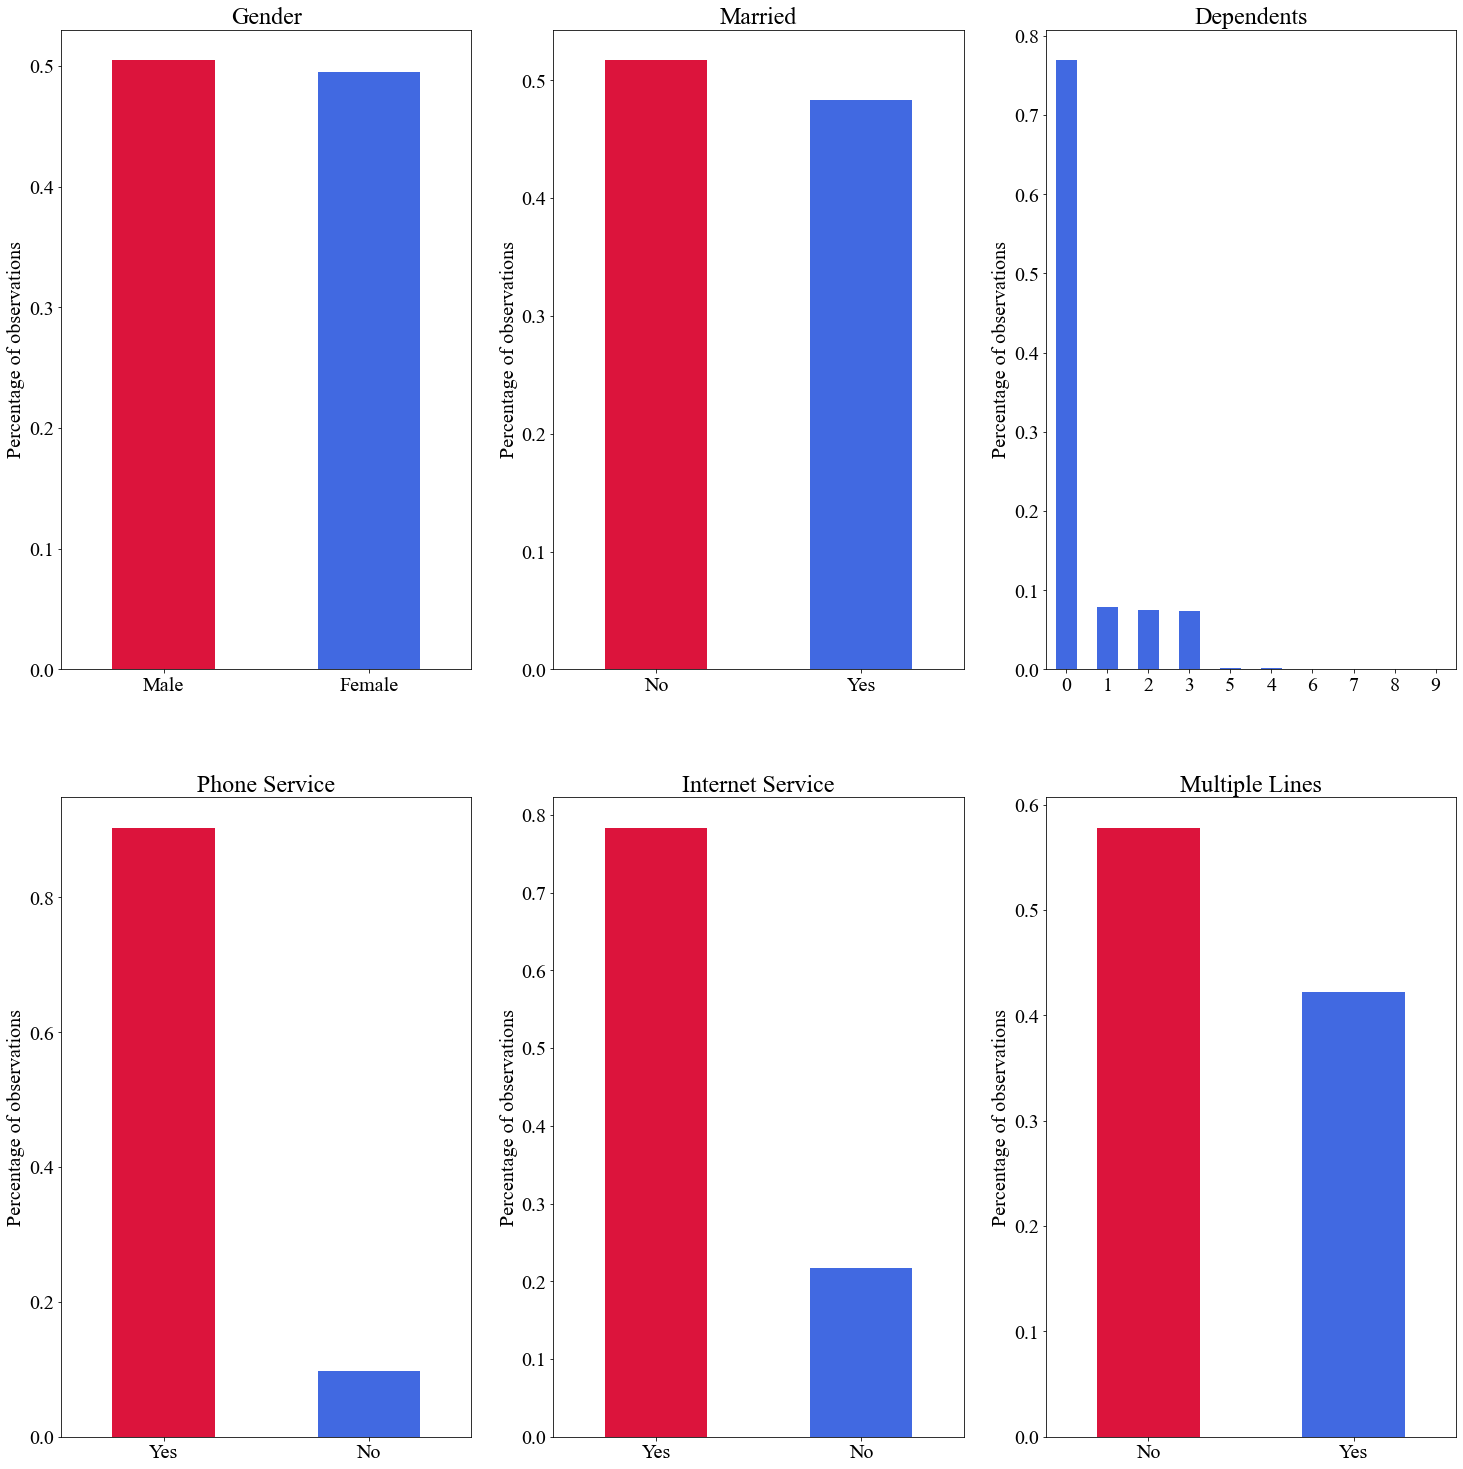

In [76]:
plt.subplot(331)
cat_variables['Gender'].value_counts(normalize = True).plot.bar(figsize = (25, 40), title = 'Gender', color = ['crimson', 'royalblue'])
plt.xticks(rotation = 360)
plt.ylabel('Percentage of observations')

plt.subplot(332)
cat_variables['Married'].value_counts(normalize = True).plot.bar(title = 'Married', color = ['crimson', 'royalblue'])
plt.xticks(rotation = 360)
plt.ylabel('Percentage of observations')

plt.subplot(333)
cat_variables['Number of Dependents'].value_counts(normalize = True).plot.bar(title = 'Dependents', color = 'royalblue')
plt.xticks(rotation = 360)
plt.ylabel('Percentage of observations')

plt.subplot(334)
cat_variables['Phone Service'].value_counts(normalize = True).plot.bar(title = 'Phone Service', color = ['crimson', 'royalblue'])
plt.xticks(rotation = 360)
plt.ylabel('Percentage of observations')

plt.subplot(335)
cat_variables['Internet Service'].value_counts(normalize = True).plot.bar(title = 'Internet Service', color = ['crimson', 'royalblue'])
plt.xticks(rotation = 360)
plt.ylabel('Percentage of observations')

plt.subplot(336)
cat_variables['Multiple Lines'].value_counts(normalize = True).plot.bar(title = 'Multiple Lines', color = ['crimson', 'royalblue'])
plt.xticks(rotation = 360)
plt.ylabel('Percentage of observations')

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "20"



plt.show()

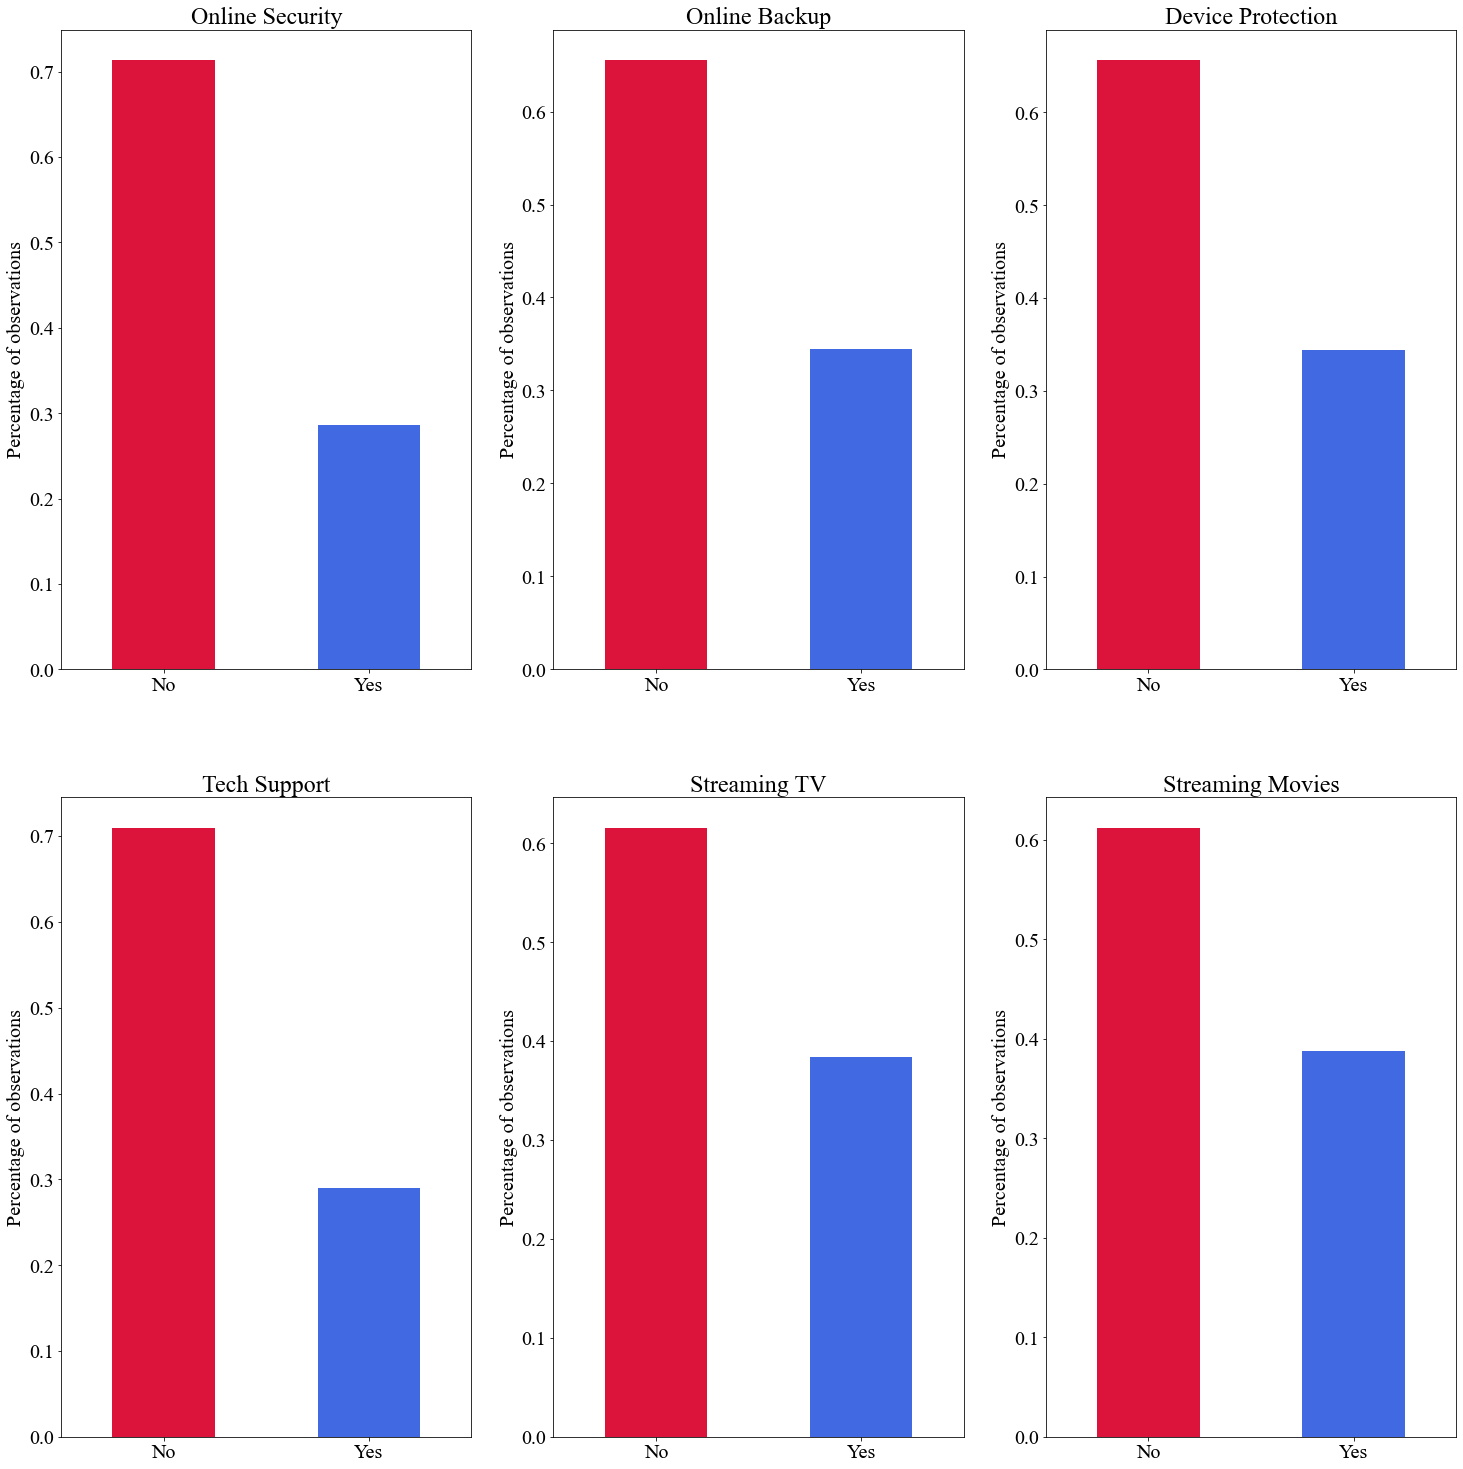

In [77]:
plt.subplot(331)
cat_variables['Online Security'].value_counts(normalize = True).plot.bar(figsize = (25, 40), title = 'Online Security', color = ['crimson', 'royalblue'])
plt.xticks(rotation = 360)
plt.ylabel('Percentage of observations')

plt.subplot(332)
cat_variables['Online Backup'].value_counts(normalize = True).plot.bar(title = 'Online Backup', color = ['crimson', 'royalblue'])
plt.xticks(rotation = 360)
plt.ylabel('Percentage of observations')

plt.subplot(333)
cat_variables['Device Protection Plan'].value_counts(normalize = True).plot.bar(title = 'Device Protection', color = ['crimson', 'royalblue'])
plt.xticks(rotation = 360)
plt.ylabel('Percentage of observations')

plt.subplot(334)
cat_variables['Premium Tech Support'].value_counts(normalize = True).plot.bar(title = 'Tech Support', color = ['crimson', 'royalblue'])
plt.xticks(rotation = 360)
plt.ylabel('Percentage of observations')

plt.subplot(335)
cat_variables['Streaming TV'].value_counts(normalize = True).plot.bar(title = 'Streaming TV', color = ['crimson', 'royalblue'])
plt.xticks(rotation = 360)
plt.ylabel('Percentage of observations')

plt.subplot(336)
cat_variables['Streaming Movies'].value_counts(normalize = True).plot.bar(title = 'Streaming Movies', color = ['crimson', 'royalblue'])
plt.xticks(rotation = 360)
plt.ylabel('Percentage of observations')

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "20"

plt.show()

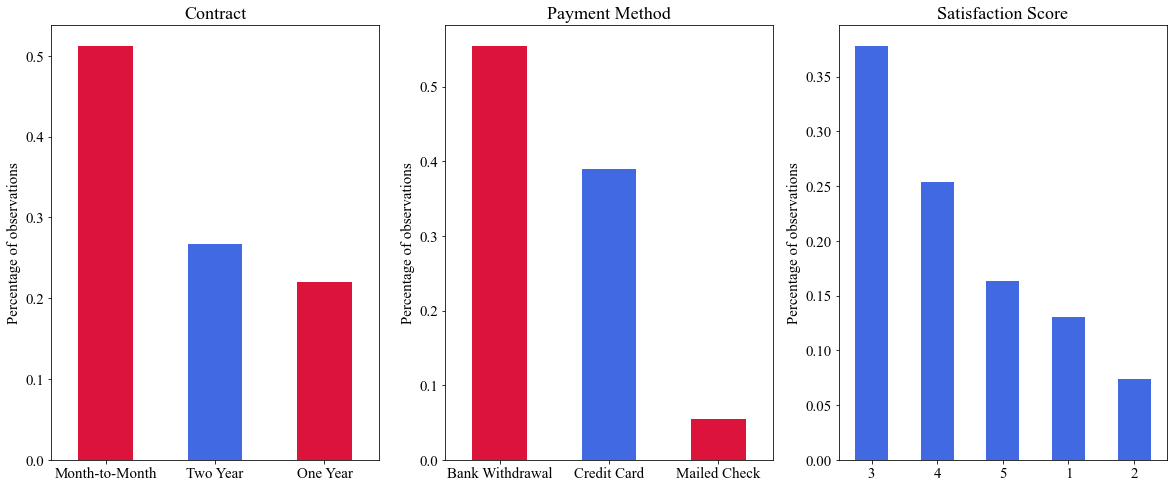

In [79]:
plt.subplot(131)
cat_variables['Contract'].value_counts(normalize = True).plot.bar(figsize = (20, 8), title = 'Contract', color = ['crimson', 'royalblue'])
plt.xticks(rotation = 360)
plt.ylabel('Percentage of observations')

plt.subplot(132)
cat_variables['Payment Method'].value_counts(normalize = True).plot.bar(title = 'Payment Method', color = ['crimson', 'royalblue'])
plt.xticks(rotation = 360)
plt.ylabel('Percentage of observations')

plt.subplot(133)
cat_variables['Satisfaction Score'].value_counts(normalize = True).plot.bar(title = 'Satisfaction Score', color = 'royalblue')
plt.xticks(rotation = 360)
plt.ylabel('Percentage of observations')

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "15"

plt.show()

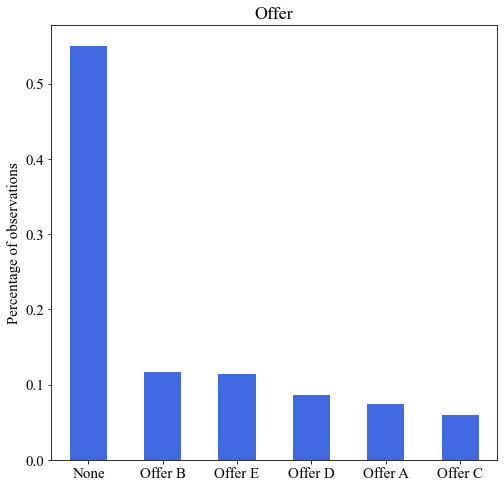

In [80]:
cat_variables['Offer'].value_counts(normalize = True).plot.bar(figsize = (8, 8), title = 'Offer', color = 'royalblue')
plt.xticks(rotation = 360)
plt.ylabel('Percentage of observations')

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "15"

plt.show()

### Numerical Variables

In [19]:
num_variables.describe()

,Age,Tenure in Months,Monthly Charge,Total Charges,CLTV,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,32.386767,64.761692,2280.381264,4400.295755,3034.379056
std,16.750352,24.542061,30.090047,2266.220462,1183.057152,2865.204542
min,19.000000,1.000000,18.250000,18.800000,2003.000000,21.360000
25%,32.000000,9.000000,35.500000,400.150000,3469.000000,605.610000
50%,46.000000,29.000000,70.350000,1394.550000,4527.000000,2108.640000
75%,60.000000,55.000000,89.850000,3786.600000,5380.500000,4801.145000
max,80.000000,72.000000,118.750000,8684.800000,6500.000000,11979.340000


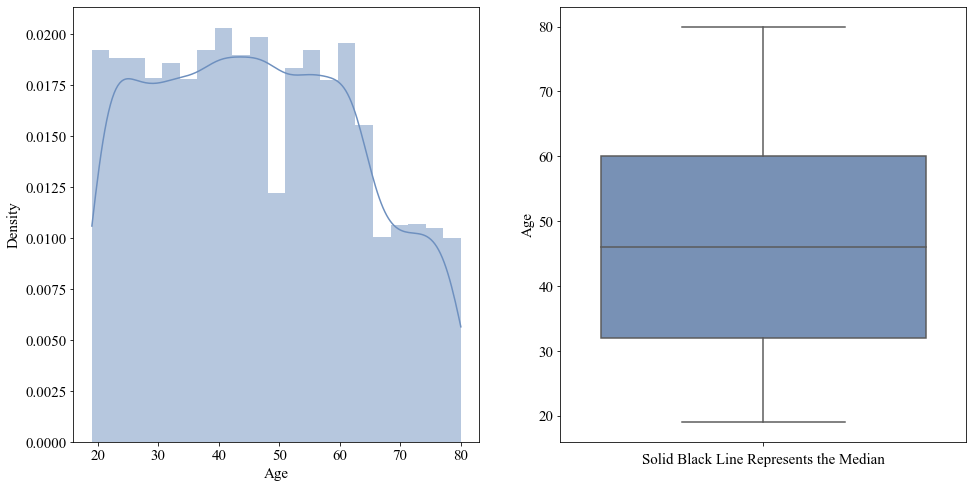

In [92]:
sns.set_palette('vlag', color_codes= True)
plt.figure(figsize=(16,8))
plt.subplot(121)
sns.histplot(num_variables['Age'], kde=True, stat="density", linewidth=0)

plt.subplot(122)
sns.boxplot(y = num_variables['Age'])
plt.xlabel('Solid Black Line Represents the Median')

plt.show()

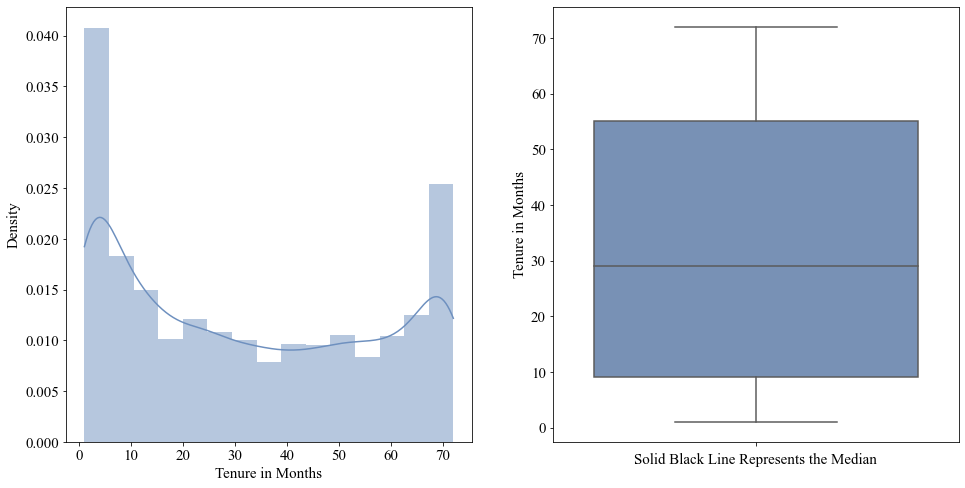

In [83]:
sns.set_palette('vlag', color_codes= True)
plt.figure(figsize=(16,8))
plt.subplot(121)
sns.histplot(num_variables['Tenure in Months'], kde=True, stat="density", linewidth=0)

plt.subplot(122)
sns.boxplot(y = num_variables['Tenure in Months'])
plt.xlabel('Solid Black Line Represents the Median')

plt.show()

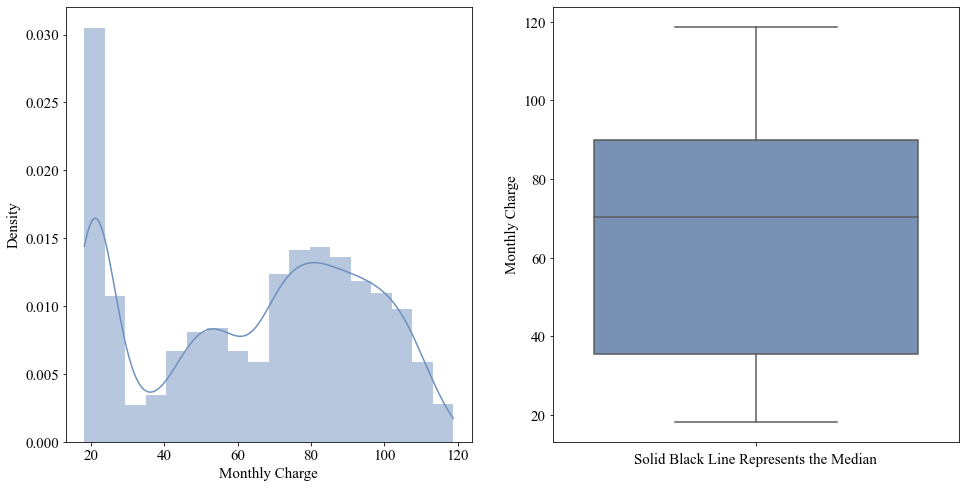

In [93]:
sns.set_palette('vlag', color_codes= True)
plt.figure(figsize=(16,8))
plt.subplot(121)
sns.histplot(num_variables['Monthly Charge'], kde=True, stat="density", linewidth=0)

plt.subplot(122)
sns.boxplot(y = num_variables['Monthly Charge'])
plt.xlabel('Solid Black Line Represents the Median')

plt.show()

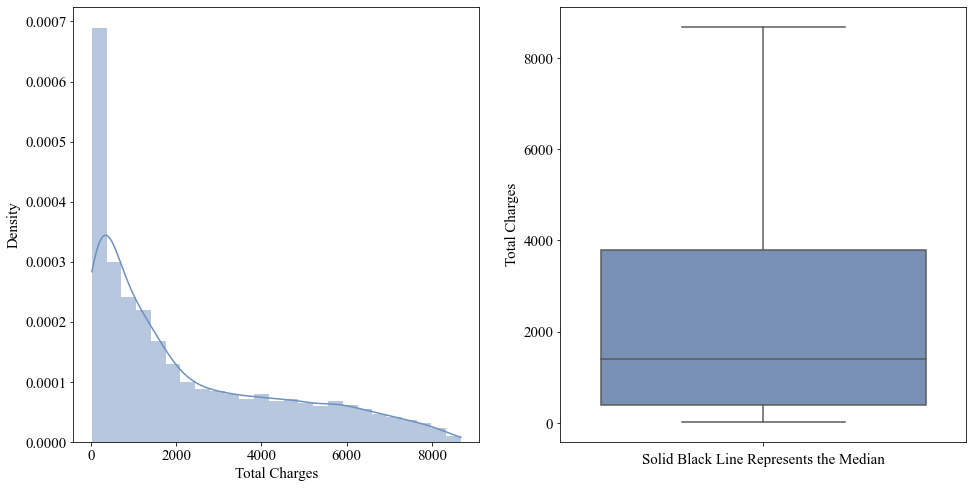

In [94]:
sns.set_palette('vlag', color_codes= True)
plt.figure(figsize=(16,8))
plt.subplot(121)
sns.histplot(num_variables['Total Charges'], kde=True, stat="density", linewidth=0)

plt.subplot(122)
sns.boxplot(y = num_variables['Total Charges'])
plt.xlabel('Solid Black Line Represents the Median')

plt.show()

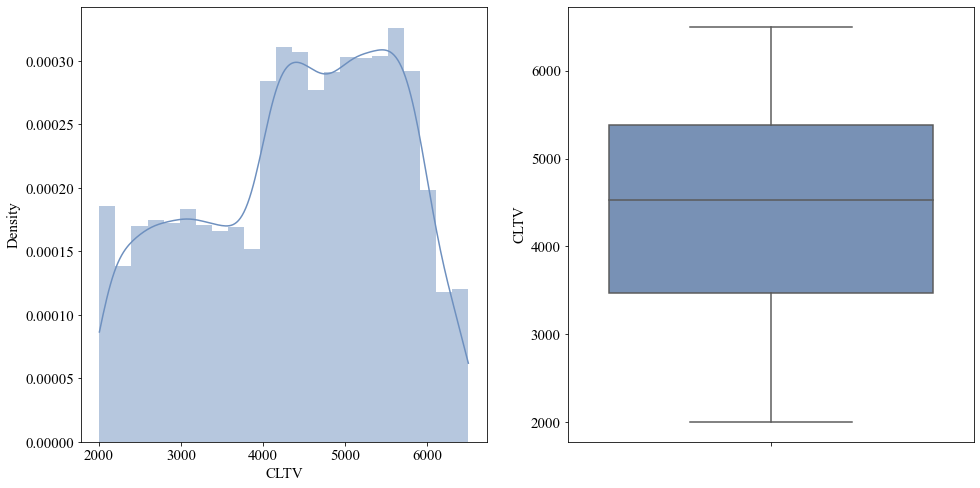

In [24]:
sns.set_palette('vlag', color_codes= True)
plt.figure(figsize=(16,8))
plt.subplot(121)
sns.histplot(num_variables['CLTV'], kde=True, stat="density", linewidth=0)

plt.subplot(122)
sns.boxplot(y = num_variables['CLTV'])
plt.xlabel('Solid Black Line Represents the Median')

plt.show()

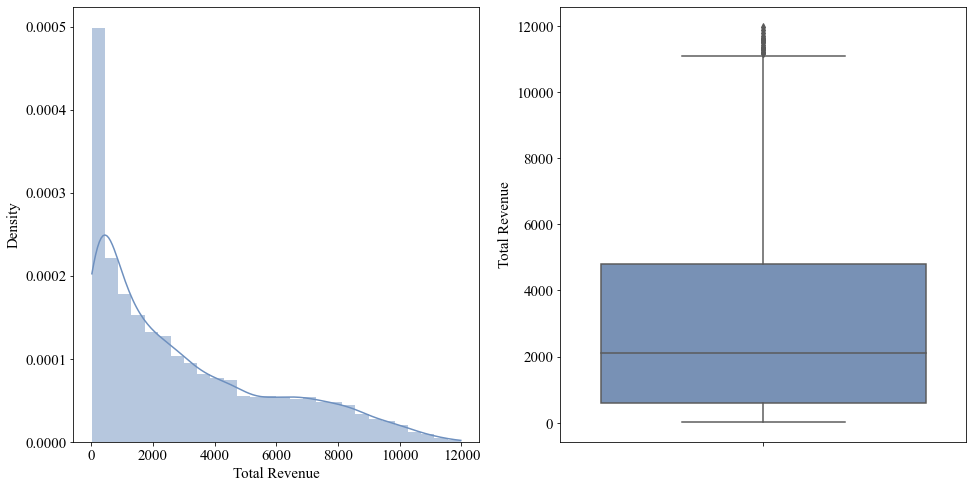

In [25]:
sns.set_palette('vlag', color_codes= True)
plt.figure(figsize=(16,8))
plt.subplot(121)
sns.histplot(num_variables['Total Revenue'], kde=True, stat="density", linewidth=0)

plt.subplot(122)
sns.boxplot(y = num_variables['Total Revenue'])
plt.xlabel('Solid Black Line Represents the Median')

plt.show()

## Bivariate Analysis

### Categorical Variables Vs Target Variable

In [26]:
Gender = pd.crosstab(df['Gender'], df['Churn Value'])
Gender

Churn Value,0,1
Gender,,
Female,2549,939
Male,2625,930


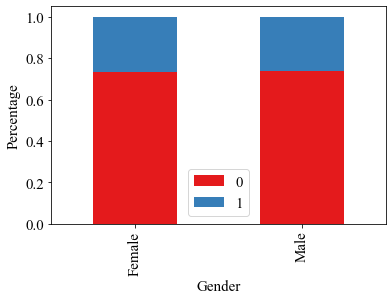

In [27]:
sns.set_palette("Set1")
Gender.div(Gender.sum(1).astype(float), axis = 0).plot.bar(stacked = True)

plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.legend(title = 'Churned')
plt.legend(loc = "best")
plt.show()

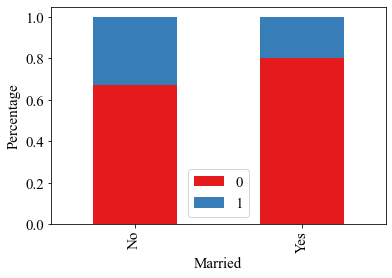

In [28]:
Married = pd.crosstab(df['Married'], df['Churn Value'])
Married.div(Married.sum(1).astype(float), axis = 0).plot.bar(stacked = True)

plt.xlabel('Married')
plt.ylabel('Percentage')
plt.legend(title = 'Churned')
plt.legend(loc = "best")

plt.rcParams["font.size"] = "15"
plt.show()

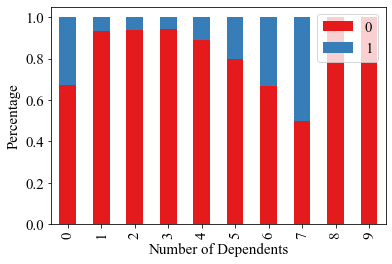

In [29]:
Dependents = pd.crosstab(df['Number of Dependents'], df['Churn Value'])
Dependents.div(Dependents.sum(1).astype(float), axis = 0).plot.bar(stacked = True)

plt.xlabel('Number of Dependents')
plt.ylabel('Percentage')
plt.legend(title = 'Churned')
plt.legend(loc = "best")
plt.rcParams["font.size"] = "15"
plt.show()

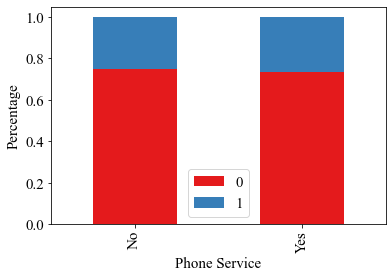

In [30]:
PhoneService = pd.crosstab(df['Phone Service'], df['Churn Value'])
PhoneService.div(PhoneService.sum(1).astype(float), axis = 0).plot.bar(stacked = True)

plt.xlabel('Phone Service')
plt.ylabel('Percentage')
plt.legend(title = 'Churned')
plt.legend(loc = "best")
plt.rcParams["font.size"] = "15"
plt.show()

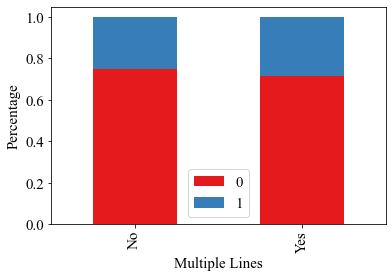

In [31]:
MultipleLines = pd.crosstab(df['Multiple Lines'], df['Churn Value'])
MultipleLines.div(MultipleLines.sum(1).astype(float), axis = 0).plot.bar(stacked = True)

plt.xlabel('Multiple Lines')
plt.ylabel('Percentage')
plt.legend(title = 'Churned')
plt.legend(loc = "best")
plt.rcParams["font.size"] = "15"
plt.show()

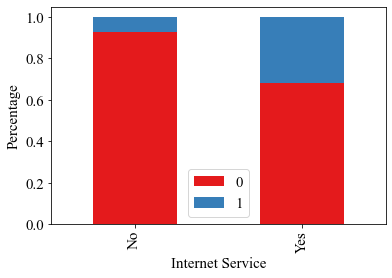

In [32]:
InternetService = pd.crosstab(df['Internet Service'], df['Churn Value'])
InternetService.div(InternetService.sum(1).astype(float), axis = 0).plot.bar(stacked = True)

plt.xlabel('Internet Service')
plt.ylabel('Percentage')
plt.legend(title = 'Churned')
plt.legend(loc = "best")
plt.rcParams["font.size"] = "15"
plt.show()

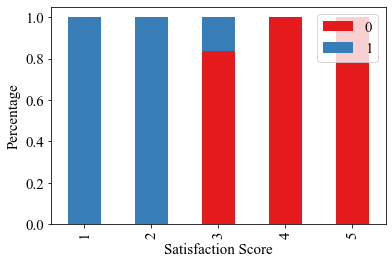

In [33]:
SatScore = pd.crosstab(df['Satisfaction Score'], df['Churn Value'])
SatScore.div(SatScore.sum(1).astype(float), axis = 0).plot.bar(stacked = True)

plt.xlabel('Satisfaction Score')
plt.ylabel('Percentage')
plt.legend(title = 'Churned')
plt.legend(loc = "best")
plt.rcParams["font.size"] = "15"
plt.show()

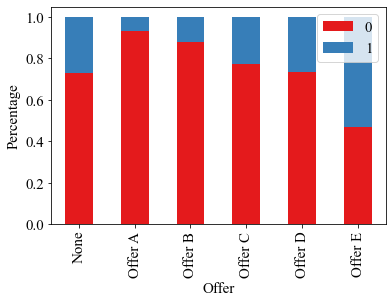

In [34]:
offer = pd.crosstab(df['Offer'], df['Churn Value'])
offer.div(offer.sum(1).astype(float), axis = 0).plot.bar(stacked = True)

plt.xlabel('Offer')
plt.ylabel('Percentage')
plt.legend(title = 'Churned')
plt.legend(loc = "best")
plt.rcParams["font.size"] = "15"
plt.show()

### Numerical Variables Vs Dependent Variable

Churn Value
0    45.344414
1    49.735688
Name: Age, dtype: float64


<AxesSubplot:xlabel='Churn Value'>

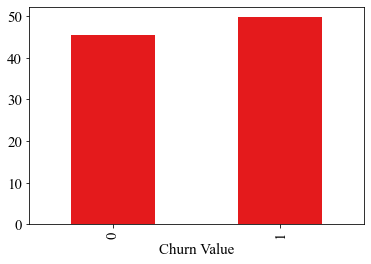

In [35]:
print(df.groupby('Churn Value')['Age'].mean())

df.groupby('Churn Value')['Age'].mean().plot.bar()

In [36]:
condition = [(df['Age'] <= 30),
            (df['Age'] > 30) & (df['Age'] <= 65),
            (df['Age'] > 65)]

values = ['Young', 'Middle Aged', 'Senior Citizen']
df['Age Bins'] = np.select(condition, values)
df.head()

,Customer ID,Count,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Quarter,...,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason,Age Bins
0,8779-QRDMV,1,Male,78,No,Yes,No,No,0,Q3,...,59.65,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data,Senior Citizen
1,7495-OOKFY,1,Female,74,No,Yes,Yes,Yes,1,Q3,...,1024.10,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer,Senior Citizen
2,1658-BYGOY,1,Male,71,No,Yes,No,Yes,3,Q3,...,1910.88,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer,Senior Citizen
3,4598-XLKNJ,1,Female,78,No,Yes,Yes,Yes,1,Q3,...,2995.07,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services,Senior Citizen
4,4846-WHAFZ,1,Female,80,No,Yes,Yes,Yes,1,Q3,...,3102.36,2,Churned,Yes,1,67,2793,Price,Extra data charges,Senior Citizen


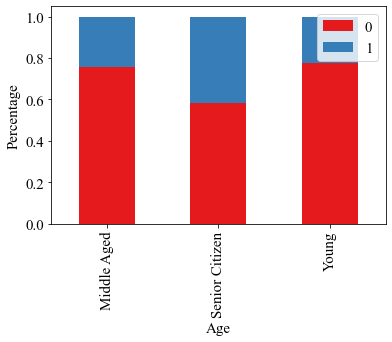

In [37]:
age_bins = pd.crosstab(df['Age Bins'], df['Churn Value'])

age_bins.div(age_bins.sum(1).astype(float), axis = 0).plot.bar(stacked = True)

plt.xlabel('Age')
plt.ylabel('Percentage')
plt.legend(title = 'Churned')
plt.legend(loc = "best")
plt.show()

Churn Value
0    37.591225
1    17.979133
Name: Tenure in Months, dtype: float64


<AxesSubplot:xlabel='Churn Value'>

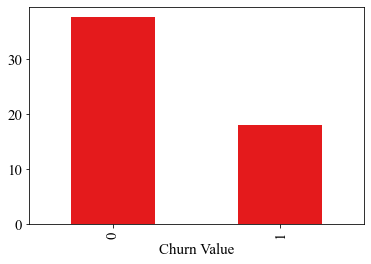

In [38]:
print(df.groupby('Churn Value')['Tenure in Months'].mean())

df.groupby('Churn Value')['Tenure in Months'].mean().plot.bar()

In [39]:
condition = [(df['Tenure in Months'] <= 15),
            (df['Tenure in Months'] > 15) & (df['Tenure in Months'] <= 35),
            (df['Tenure in Months'] > 35) & (df['Tenure in Months'] <= 55),
            (df['Tenure in Months'] > 55)]

values = ['Low', 'Average', 'High', 'Very High']
df['Tenure Bins'] = np.select(condition, values)
df.head()

,Customer ID,Count,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Quarter,...,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason,Age Bins,Tenure Bins
0,8779-QRDMV,1,Male,78,No,Yes,No,No,0,Q3,...,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data,Senior Citizen,Low
1,7495-OOKFY,1,Female,74,No,Yes,Yes,Yes,1,Q3,...,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer,Senior Citizen,Low
2,1658-BYGOY,1,Male,71,No,Yes,No,Yes,3,Q3,...,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer,Senior Citizen,Average
3,4598-XLKNJ,1,Female,78,No,Yes,Yes,Yes,1,Q3,...,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services,Senior Citizen,Average
4,4846-WHAFZ,1,Female,80,No,Yes,Yes,Yes,1,Q3,...,2,Churned,Yes,1,67,2793,Price,Extra data charges,Senior Citizen,High


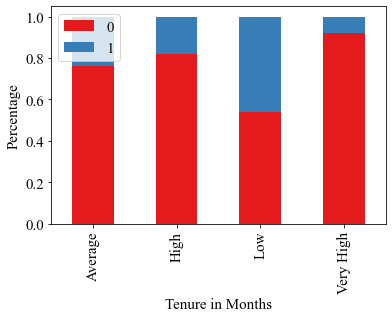

In [40]:
tenure_bins = pd.crosstab(df['Tenure Bins'], df['Churn Value'])

tenure_bins.div(tenure_bins.sum(1).astype(float), axis = 0).plot.bar(stacked = True)

plt.xlabel('Tenure in Months')
plt.ylabel('Percentage')
plt.legend(title = 'Churned')
plt.legend(loc = "best")
plt.show()

Churn Value
0    61.265124
1    74.441332
Name: Monthly Charge, dtype: float64


<AxesSubplot:xlabel='Churn Value'>

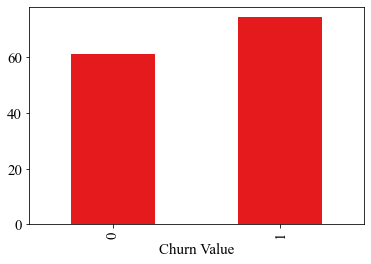

In [41]:
print(df.groupby('Churn Value')['Monthly Charge'].mean())

df.groupby('Churn Value')['Monthly Charge'].mean().plot.bar()

In [42]:
condition = [(df['Monthly Charge'] <= 50),
            (df['Monthly Charge'] > 50) & (df['Monthly Charge'] <= 75),
            (df['Monthly Charge'] > 75) & (df['Monthly Charge'] <= 100),
            (df['Monthly Charge'] > 100)]

values = ['Low', 'Average', 'High', 'Very High']
df['Monthly Charge Bins'] = np.select(condition, values)
df.head()

,Customer ID,Count,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Quarter,...,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason,Age Bins,Tenure Bins,Monthly Charge Bins
0,8779-QRDMV,1,Male,78,No,Yes,No,No,0,Q3,...,Churned,Yes,1,91,5433,Competitor,Competitor offered more data,Senior Citizen,Low,Low
1,7495-OOKFY,1,Female,74,No,Yes,Yes,Yes,1,Q3,...,Churned,Yes,1,69,5302,Competitor,Competitor made better offer,Senior Citizen,Low,High
2,1658-BYGOY,1,Male,71,No,Yes,No,Yes,3,Q3,...,Churned,Yes,1,81,3179,Competitor,Competitor made better offer,Senior Citizen,Average,High
3,4598-XLKNJ,1,Female,78,No,Yes,Yes,Yes,1,Q3,...,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services,Senior Citizen,Average,High
4,4846-WHAFZ,1,Female,80,No,Yes,Yes,Yes,1,Q3,...,Churned,Yes,1,67,2793,Price,Extra data charges,Senior Citizen,High,High


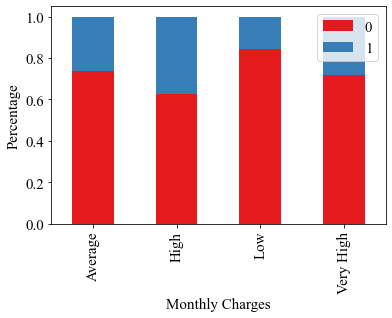

In [43]:
mcharges_bins = pd.crosstab(df['Monthly Charge Bins'], df['Churn Value'])

mcharges_bins.div(mcharges_bins.sum(1).astype(float), axis = 0).plot.bar(stacked = True)

plt.xlabel('Monthly Charges')
plt.ylabel('Percentage')
plt.legend(title = 'Churned')
plt.legend(loc = "best")
plt.show()

Churn Value
0    2550.792103
1    1531.796094
Name: Total Charges, dtype: float64


<AxesSubplot:xlabel='Churn Value'>

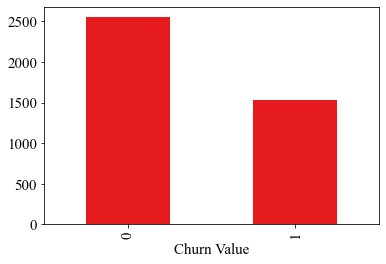

In [44]:
print(df.groupby('Churn Value')['Total Charges'].mean())

df.groupby('Churn Value')['Total Charges'].mean().plot.bar()

In [45]:
condition = [(df['Total Charges'] <= 1500),
            (df['Total Charges'] > 1500) & (df['Total Charges'] <= 3000),
            (df['Total Charges'] > 3000) & (df['Total Charges'] <= 5000),
            (df['Total Charges'] > 5000)]

values = ['Low', 'Average', 'High', 'Very High']
df['Total Charges Bins'] = np.select(condition, values)
df.head()

,Customer ID,Count,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Quarter,...,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason,Age Bins,Tenure Bins,Monthly Charge Bins,Total Charges Bins
0,8779-QRDMV,1,Male,78,No,Yes,No,No,0,Q3,...,Yes,1,91,5433,Competitor,Competitor offered more data,Senior Citizen,Low,Low,Low
1,7495-OOKFY,1,Female,74,No,Yes,Yes,Yes,1,Q3,...,Yes,1,69,5302,Competitor,Competitor made better offer,Senior Citizen,Low,High,Low
2,1658-BYGOY,1,Male,71,No,Yes,No,Yes,3,Q3,...,Yes,1,81,3179,Competitor,Competitor made better offer,Senior Citizen,Average,High,Average
3,4598-XLKNJ,1,Female,78,No,Yes,Yes,Yes,1,Q3,...,Yes,1,88,5337,Dissatisfaction,Limited range of services,Senior Citizen,Average,High,Average
4,4846-WHAFZ,1,Female,80,No,Yes,Yes,Yes,1,Q3,...,Yes,1,67,2793,Price,Extra data charges,Senior Citizen,High,High,Average


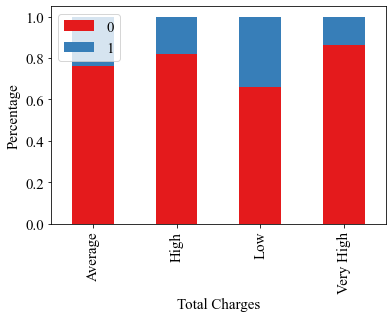

In [46]:
tcharges_bins = pd.crosstab(df['Total Charges Bins'], df['Churn Value'])

tcharges_bins.div(tcharges_bins.sum(1).astype(float), axis = 0).plot.bar(stacked = True)

plt.xlabel('Total Charges')
plt.ylabel('Percentage')
plt.legend(title = 'Churned')
plt.legend(loc = "best")
plt.show()

Churn Value
0    4490.921337
1    4149.414660
Name: CLTV, dtype: float64


<AxesSubplot:xlabel='Churn Value'>

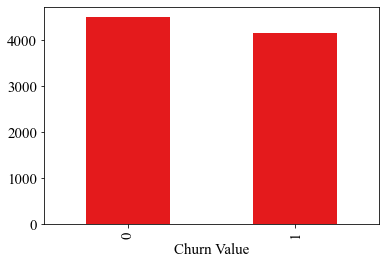

In [47]:
print(df.groupby('Churn Value')['CLTV'].mean())

df.groupby('Churn Value')['CLTV'].mean().plot.bar()

In [48]:
condition = [(df['CLTV'] <= 3000),
            (df['CLTV'] > 3000) & (df['CLTV'] <= 5000),
            (df['CLTV'] > 5000) & (df['CLTV'] <= 6000),
            (df['CLTV'] > 6000)]

values = ['Low', 'Average', 'High', 'Very High']
df['CLTV Bins'] = np.select(condition, values)
df.head()

,Customer ID,Count,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Quarter,...,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason,Age Bins,Tenure Bins,Monthly Charge Bins,Total Charges Bins,CLTV Bins
0,8779-QRDMV,1,Male,78,No,Yes,No,No,0,Q3,...,1,91,5433,Competitor,Competitor offered more data,Senior Citizen,Low,Low,Low,High
1,7495-OOKFY,1,Female,74,No,Yes,Yes,Yes,1,Q3,...,1,69,5302,Competitor,Competitor made better offer,Senior Citizen,Low,High,Low,High
2,1658-BYGOY,1,Male,71,No,Yes,No,Yes,3,Q3,...,1,81,3179,Competitor,Competitor made better offer,Senior Citizen,Average,High,Average,Average
3,4598-XLKNJ,1,Female,78,No,Yes,Yes,Yes,1,Q3,...,1,88,5337,Dissatisfaction,Limited range of services,Senior Citizen,Average,High,Average,High
4,4846-WHAFZ,1,Female,80,No,Yes,Yes,Yes,1,Q3,...,1,67,2793,Price,Extra data charges,Senior Citizen,High,High,Average,Low


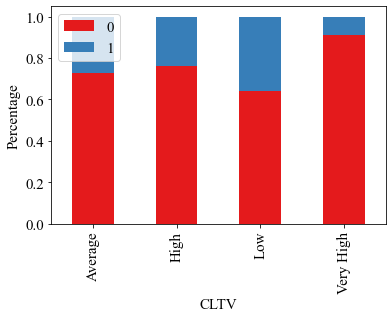

In [49]:
cltv_bins = pd.crosstab(df['CLTV Bins'], df['Churn Value'])

cltv_bins.div(cltv_bins.sum(1).astype(float), axis = 0).plot.bar(stacked = True)

plt.xlabel('CLTV')
plt.ylabel('Percentage')
plt.legend(title = 'Churned')
plt.legend(loc = "best")
plt.show()

# Data Pre-Processing

## Numerical Variables

In [50]:
scaler = StandardScaler()
num_variables_scaled = scaler.fit_transform(num_variables)

num_df = pd.DataFrame(num_variables_scaled)
num_df.columns = ['Age', 'Tenure in Months', 'Monthly Charges', 'Total Charges', 'CLTV', 'Total Revenue']

print(num_df.shape)
num_df.head(10)

(7043, 6)


,Age,Tenure in Months,Monthly Charges,Total Charges,CLTV,Total Revenue
0,1.880110,-1.278988,-0.834611,-0.988823,0.872974,-1.038299
1,1.641292,-0.993743,0.528063,-0.726848,0.762236,-0.701668
2,1.462179,-0.586250,1.019955,-0.232929,-1.032395,-0.392146
3,1.880110,-0.301005,1.121324,0.103315,0.791822,-0.013720
4,1.999519,0.187986,0.390134,0.259379,-1.358692,0.023728
5,1.521884,-0.219507,0.441649,-0.063935,0.200938,-0.278872
6,1.760701,-1.278988,0.189056,-0.975231,-0.368813,-1.029196
7,1.163657,1.043720,-0.646828,0.163640,0.882272,-0.148038
8,1.402475,-0.708498,0.322000,-0.500729,1.113047,-0.428492
9,1.820406,-1.034492,0.388472,-0.784084,0.015811,-0.821354


In [51]:
num_df2 = pd.concat([num_df, churn_value], axis = 1)
num_df2.head()

,Age,Tenure in Months,Monthly Charges,Total Charges,CLTV,Total Revenue,Churn Value
0,1.880110,-1.278988,-0.834611,-0.988823,0.872974,-1.038299,1
1,1.641292,-0.993743,0.528063,-0.726848,0.762236,-0.701668,1
2,1.462179,-0.586250,1.019955,-0.232929,-1.032395,-0.392146,1
3,1.880110,-0.301005,1.121324,0.103315,0.791822,-0.013720,1
4,1.999519,0.187986,0.390134,0.259379,-1.358692,0.023728,1


In [52]:
#The correlation matrix for all numerical variables
matrix = num_df2.corr()
matrix

,Age,Tenure in Months,Monthly Charges,Total Charges,CLTV,Total Revenue,Churn Value
Age,1.000000,0.009927,0.144685,0.059684,-0.001826,0.048265,0.115760
Tenure in Months,0.009927,1.000000,0.247582,0.826074,0.396292,0.853146,-0.352861
Monthly Charges,0.144685,0.247582,1.000000,0.651236,0.098693,0.588887,0.193356
Total Charges,0.059684,0.826074,0.651236,1.000000,0.341947,0.972212,-0.198546
CLTV,-0.001826,0.396292,0.098693,0.341947,1.000000,0.354198,-0.127463
Total Revenue,0.048265,0.853146,0.588887,0.972212,0.354198,1.000000,-0.223003
Churn Value,0.115760,-0.352861,0.193356,-0.198546,-0.127463,-0.223003,1.000000


<AxesSubplot:>

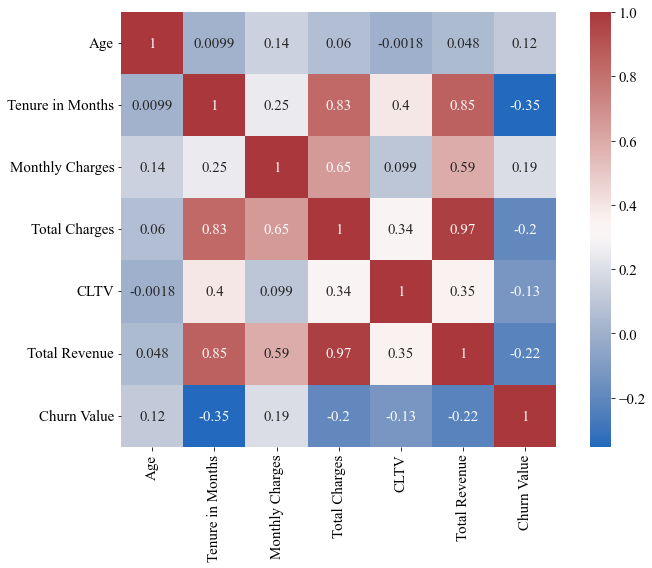

In [53]:
#Heatmap
fig, axes = plt.subplots(figsize = (12, 8))
sns.heatmap(matrix, vmax=1, square = True, cmap = 'vlag', annot = True)

In [100]:
def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

In [101]:
matrix2 = calculate_pvalues(num_df2)
matrix2

,Age,Tenure in Months,Monthly Charges,Total Charges,CLTV,Total Revenue,Churn Value
Age,0.0,0.4049,0.0,0.0,0.8783,0.0001,0.0
Tenure in Months,0.4049,0.0,0.0,0.0,0.0,0.0,0.0
Monthly Charges,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Total Charges,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CLTV,0.8783,0.0,0.0,0.0,0.0,0.0,0.0
Total Revenue,0.0001,0.0,0.0,0.0,0.0,0.0,0.0
Churn Value,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Categorical Variables

In [54]:
cat_df = pd.get_dummies(cat_variables)
print(cat_df.shape)
cat_df.head()

(7043, 49)


,Gender_Female,Gender_Male,Married_No,Married_Yes,Number of Dependents_0,Number of Dependents_1,Number of Dependents_2,Number of Dependents_3,Number of Dependents_4,Number of Dependents_5,...,Contract_One Year,Contract_Two Year,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Payment Method_Mailed Check,Satisfaction Score_1,Satisfaction Score_2,Satisfaction Score_3,Satisfaction Score_4,Satisfaction Score_5
0,0,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,1,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,0,1,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
3,1,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,1,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


## All independent variables

In [55]:
ind_vars = pd.concat([cat_df, num_df], axis = 1)
print(ind_vars.shape)
ind_vars.head()

(7043, 55)


,Gender_Female,Gender_Male,Married_No,Married_Yes,Number of Dependents_0,Number of Dependents_1,Number of Dependents_2,Number of Dependents_3,Number of Dependents_4,Number of Dependents_5,...,Satisfaction Score_2,Satisfaction Score_3,Satisfaction Score_4,Satisfaction Score_5,Age,Tenure in Months,Monthly Charges,Total Charges,CLTV,Total Revenue
0,0,1,1,0,1,0,0,0,0,0,...,0,1,0,0,1.880110,-1.278988,-0.834611,-0.988823,0.872974,-1.038299
1,1,0,0,1,0,1,0,0,0,0,...,0,1,0,0,1.641292,-0.993743,0.528063,-0.726848,0.762236,-0.701668
2,0,1,1,0,0,0,0,1,0,0,...,1,0,0,0,1.462179,-0.586250,1.019955,-0.232929,-1.032395,-0.392146
3,1,0,0,1,0,1,0,0,0,0,...,1,0,0,0,1.880110,-0.301005,1.121324,0.103315,0.791822,-0.013720
4,1,0,0,1,0,1,0,0,0,0,...,1,0,0,0,1.999519,0.187986,0.390134,0.259379,-1.358692,0.023728


# Model Building

In [56]:
X = ind_vars
Y = churn_value

In [57]:
# Split the dataset in train and test-set 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, 
                                                    random_state = 101)

In [58]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((4930, 55), (2113, 55), (4930,), (2113,))

## Logistic Regression

In [59]:
#Stratified 5 folds

mean_accuracy = []
mean_auc = []
i = 1
kfold = StratifiedKFold(n_splits = 5, random_state=101, shuffle = True)

for train_index, test_index in kfold.split(X_train, Y_train):
    print('\n{} of kfold {}'.format(i, kfold.n_splits))
    xtr, xvl = X_train.iloc[train_index], X_train.iloc[test_index]
    ytr, yvl = Y_train.iloc[train_index], Y_train.iloc[test_index]
    
    logmodel = LogisticRegression(random_state = 101, max_iter= 1000)
    logmodel.fit(xtr, ytr)
    pred_values = logmodel.predict(xvl)
    score = round(accuracy_score(yvl, pred_values), 4)
    y_pred_proba = logmodel.predict_proba(xvl)[::, 1]
    auc = round(metrics.roc_auc_score(yvl, y_pred_proba), 4)
    mean_auc.append(auc)
    print('AUC', auc)
    mean_accuracy.append(score)
    print('Accuracy Score', score)
    i += 1
    
print("\nMean Validation Accuracy: ", round((sum(mean_accuracy)/len(mean_accuracy)), 4))
print("\nMean Validation AUC: ", round((sum(mean_auc)/len(mean_auc)), 4))


1 of kfold 5
AUC 0.9904
Accuracy Score 0.9544

2 of kfold 5
AUC 0.9912
Accuracy Score 0.9594

3 of kfold 5
AUC 0.9903
Accuracy Score 0.9523

4 of kfold 5
AUC 0.99
Accuracy Score 0.9594

5 of kfold 5
AUC 0.9889
Accuracy Score 0.9513

Mean Validation Accuracy:  0.9554

Mean Validation AUC:  0.9902


In [60]:
LR_pred_test_values = logmodel.predict(X_test)
score_LR = round(accuracy_score(Y_test, LR_pred_test_values), 4)
y_pred_proba_LR = logmodel.predict_proba(X_test)[::, 1]

#calculate AUC of model
auc_LR = round(metrics.roc_auc_score(Y_test, y_pred_proba_LR), 4)

#print AUC score
print('AUC', auc_LR)
print('Accuracy Score', score_LR)

AUC 0.9909
Accuracy Score 0.9584


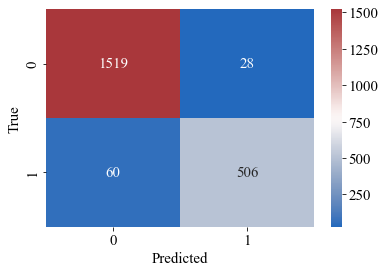

In [122]:
conf_matrix_LR = confusion_matrix(Y_test, LR_pred_test_values)
sns.heatmap(conf_matrix_LR, annot = True, cmap = 'vlag', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "15"

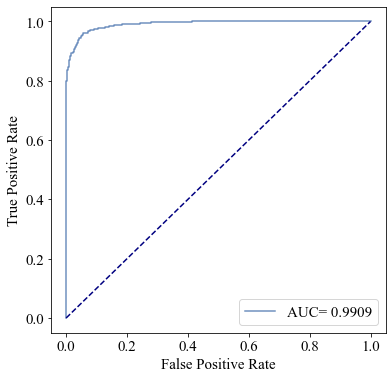

In [111]:
fpr_LR, tpr_LR, _ = metrics.roc_curve(Y_test,  y_pred_proba_LR)

plt.figure(figsize=(6,6))
plt.plot(fpr_LR,tpr_LR,label="AUC= "+str(auc_LR))
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "15"
plt.show()

## Decision Tree

In [86]:
#Stratified 5 folds

mean_accuracy = []
mean_auc = []
i = 1
kfold = StratifiedKFold(n_splits = 5, random_state=101, shuffle = True)

for train_index, test_index in kfold.split(X_train, Y_train):
    print('\n{} of kfold {}'.format(i, kfold.n_splits))
    xtr, xvl = X_train.iloc[train_index], X_train.iloc[test_index]
    ytr, yvl = Y_train.iloc[train_index], Y_train.iloc[test_index]
    
    DecTree = tree.DecisionTreeClassifier(random_state = 101, criterion='entropy')
    DecTree.fit(xtr, ytr)
    pred_values = DecTree.predict(xvl)
    score = round(accuracy_score(yvl, pred_values), 4)
    y_pred_proba = DecTree.predict_proba(xvl)[::, 1]
    auc = round(metrics.roc_auc_score(yvl, y_pred_proba), 4)
    mean_auc.append(auc)
    print('AUC', auc)
    mean_accuracy.append(score)
    print('Accuracy Score', score)
    i += 1
    
print("\nMean Validation Accuracy: ", round((sum(mean_accuracy)/len(mean_accuracy)), 4))
print("\nMean Validation AUC: ", round((sum(mean_auc)/len(mean_auc)), 4))


1 of kfold 5
AUC 0.9309
Accuracy Score 0.9473

2 of kfold 5
AUC 0.9237
Accuracy Score 0.9422

3 of kfold 5
AUC 0.9303
Accuracy Score 0.9462

4 of kfold 5
AUC 0.9189
Accuracy Score 0.9402

5 of kfold 5
AUC 0.909
Accuracy Score 0.9239

Mean Validation Accuracy:  0.94

Mean Validation AUC:  0.9226


In [87]:
DT_pred_test_values = DecTree.predict(X_test)
score_DT = round(accuracy_score(Y_test, DT_pred_test_values), 4)

y_pred_proba_DT = DecTree.predict_proba(X_test)[::, 1]

#calculate AUC of model
auc_DT = round(metrics.roc_auc_score(Y_test, y_pred_proba_DT), 4)

#print AUC score
print('AUC', auc_DT)
print('Accuracy Score', score_DT)

AUC 0.9246
Accuracy Score 0.938


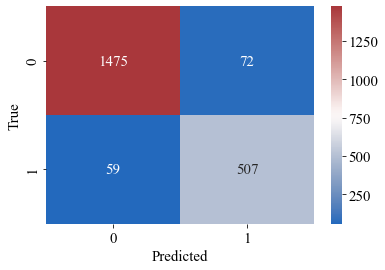

In [123]:
conf_matrix_DT = confusion_matrix(Y_test, DT_pred_test_values)
sns.heatmap(conf_matrix_DT, annot = True, cmap = 'vlag', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "15"

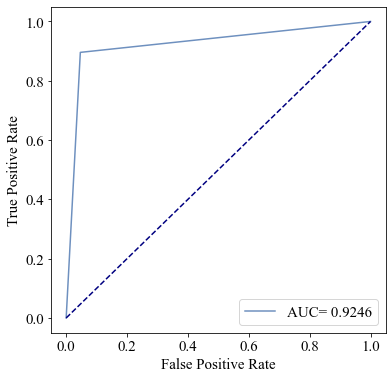

In [112]:
fpr_DT, tpr_DT, _ = metrics.roc_curve(Y_test,  y_pred_proba_DT)

plt.figure(figsize=(6,6))
plt.plot(fpr_DT,tpr_DT,label="AUC= "+str(auc_DT))
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "15"
plt.show()

## Random Forest

In [88]:
#Stratified 5 folds

mean_accuracy = []
mean_auc = []
i = 1
kfold = StratifiedKFold(n_splits = 5, random_state=101, shuffle = True)

for train_index, test_index in kfold.split(X_train, Y_train):
    print('\n{} of kfold {}'.format(i, kfold.n_splits))
    xtr, xvl = X_train.iloc[train_index], X_train.iloc[test_index]
    ytr, yvl = Y_train.iloc[train_index], Y_train.iloc[test_index]
    
    RandFor = RandomForestClassifier(random_state = 101, criterion='entropy')
    RandFor.fit(xtr, ytr)
    pred_values = RandFor.predict(xvl)
    score = round(accuracy_score(yvl, pred_values), 4)
    y_pred_proba = RandFor.predict_proba(xvl)[::, 1]
    auc = round(metrics.roc_auc_score(yvl, y_pred_proba), 4)
    mean_auc.append(auc)
    print('AUC', auc)
    mean_accuracy.append(score)
    print('Accuracy Score', score)
    i += 1
    
print("\nMean Validation Accuracy: ", round((sum(mean_accuracy)/len(mean_accuracy)), 4))
print("\nMean Validation AUC: ", round((sum(mean_auc)/len(mean_auc)), 4))


1 of kfold 5
AUC 0.9859
Accuracy Score 0.9625

2 of kfold 5
AUC 0.9881
Accuracy Score 0.9584

3 of kfold 5
AUC 0.988
Accuracy Score 0.9574

4 of kfold 5
AUC 0.9885
Accuracy Score 0.9625

5 of kfold 5
AUC 0.9848
Accuracy Score 0.9533

Mean Validation Accuracy:  0.9588

Mean Validation AUC:  0.9871


In [89]:
RF_pred_test_values = RandFor.predict(X_test)
score_RF = round(accuracy_score(Y_test, RF_pred_test_values), 4)

y_pred_proba_RF = RandFor.predict_proba(X_test)[::, 1]

#calculate AUC of model
auc_RF = round(metrics.roc_auc_score(Y_test, y_pred_proba_RF), 4)

#print AUC score
print('AUC', auc_RF)
print('Accuracy', score_RF)

AUC 0.9873
Accuracy 0.9602


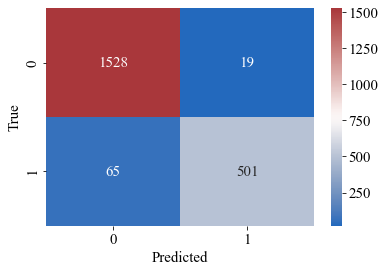

In [124]:
conf_matrix_RF = confusion_matrix(Y_test, RF_pred_test_values)
sns.heatmap(conf_matrix_RF, annot = True, cmap = 'vlag', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "15"

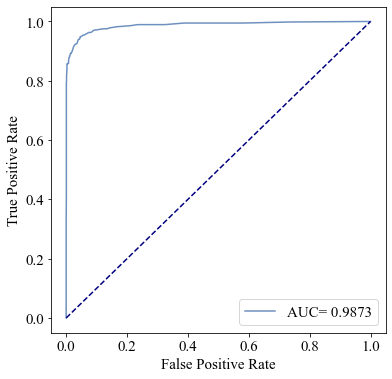

In [113]:
fpr_RF, tpr_RF, _ = metrics.roc_curve(Y_test,  y_pred_proba_RF)

plt.figure(figsize=(6,6))
plt.plot(fpr_RF,tpr_RF,label="AUC= "+str(auc_RF))
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "15"
plt.show()

## XG Boost

In [90]:
#Stratified 5 folds

mean_accuracy = []
i = 1
kfold = StratifiedKFold(n_splits = 5, random_state=101, shuffle = True)

for train_index, test_index in kfold.split(X_train, Y_train):
    print('\n{} of kfold {}'.format(i, kfold.n_splits))
    xtr, xvl = X_train.iloc[train_index], X_train.iloc[test_index]
    ytr, yvl = Y_train.iloc[train_index], Y_train.iloc[test_index]
    
    XGmod = XGBClassifier(random_state=101, n_estimators = 100, max_depth = 4, use_label_encoder =False, eval_metric='mlogloss')
    XGmod.fit(xtr, ytr)
    pred_values = XGmod.predict(xvl)
    score = round(accuracy_score(yvl, pred_values), 4)
    y_pred_proba = XGmod.predict_proba(xvl)[::, 1]
    auc = round(metrics.roc_auc_score(yvl, y_pred_proba), 4)
    mean_auc.append(auc)
    print('AUC', auc)
    mean_accuracy.append(score)
    print('Accuracy Score', score)
    i += 1
    
print("\nMean Validation Accuracy: ", round((sum(mean_accuracy)/len(mean_accuracy)), 4))
print("\nMean Validation AUC: ", round((sum(mean_auc)/len(mean_auc)), 4))


1 of kfold 5
AUC 0.989
Accuracy Score 0.9554

2 of kfold 5
AUC 0.9883
Accuracy Score 0.9493

3 of kfold 5
AUC 0.9898
Accuracy Score 0.9523

4 of kfold 5
AUC 0.9887
Accuracy Score 0.9604

5 of kfold 5
AUC 0.989
Accuracy Score 0.9513

Mean Validation Accuracy:  0.9537

Mean Validation AUC:  0.988


In [91]:
XGB_pred_test_values = XGmod.predict(X_test)
score_XGB = round(accuracy_score(Y_test, XGB_pred_test_values), 4)

y_pred_proba_XGB = XGmod.predict_proba(X_test)[::, 1]

#calculate AUC of model
auc_XGB = round(metrics.roc_auc_score(Y_test, y_pred_proba_XGB), 4)

#print AUC score
print('AUC', auc_XGB)
print('Accuracy Score', score_XGB)

AUC 0.9908
Accuracy Score 0.9565


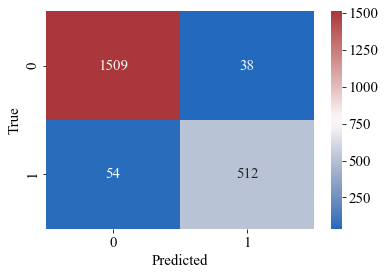

In [125]:
conf_matrix_XGB = confusion_matrix(Y_test, XGB_pred_test_values)
sns.heatmap(conf_matrix_XGB, annot = True, cmap = 'vlag', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "15"

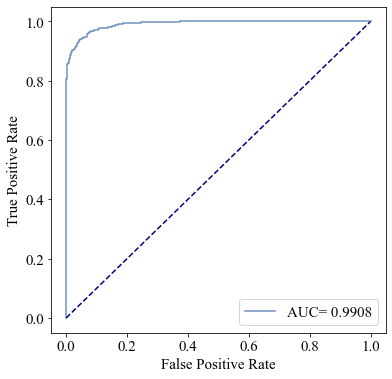

In [114]:
fpr_XGB, tpr_XGB, _ = metrics.roc_curve(Y_test,  y_pred_proba_XGB)

plt.figure(figsize=(6,6))
plt.plot(fpr_XGB,tpr_XGB,label="AUC= "+str(auc_XGB))
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "15"
plt.show()

## Support Vector Machine

In [67]:
#Stratified 5 folds

mean_accuracy = []
i = 1
kfold = StratifiedKFold(n_splits = 5, random_state=101, shuffle = True)

for train_index, test_index in kfold.split(X_train, Y_train):
    print('\n{} of kfold {}'.format(i, kfold.n_splits))
    xtr, xvl = X_train.iloc[train_index], X_train.iloc[test_index]
    ytr, yvl = Y_train.iloc[train_index], Y_train.iloc[test_index]
    
    SVC = svm.SVC(random_state = 101, kernel = "linear", probability=True)
    SVC.fit(xtr, ytr)
    pred_values = SVC.predict(xvl)
    score = round(accuracy_score(yvl, pred_values), 4)
    y_pred_proba = SVC.predict_proba(xvl)[::, 1]
    auc = round(metrics.roc_auc_score(yvl, y_pred_proba), 4)
    mean_auc.append(auc)
    print('AUC', auc)
    mean_accuracy.append(score)
    print('Accuracy Score', score)
    i += 1
    
print("\nMean Validation Accuracy: ", round((sum(mean_accuracy)/len(mean_accuracy)), 4))
print("\nMean Validation AUC: ", round((sum(mean_auc)/len(mean_auc)), 4))


1 of kfold 5
AUC 0.9897
Accuracy Score 0.9564

2 of kfold 5
AUC 0.9896
Accuracy Score 0.9584

3 of kfold 5
AUC 0.9889
Accuracy Score 0.9523

4 of kfold 5
AUC 0.9865
Accuracy Score 0.9594

5 of kfold 5
AUC 0.9868
Accuracy Score 0.9544

Mean Validation Accuracy:  0.9562

Mean Validation AUC:  0.988


In [68]:
SVM_pred_test_values = SVC.predict(X_test)
score_SVM = round(accuracy_score(Y_test, SVM_pred_test_values), 4)

y_pred_proba_SVM = SVC.predict_proba(X_test)[::, 1]

#calculate AUC of model
auc_SVM = round(metrics.roc_auc_score(Y_test, y_pred_proba_SVM), 4)

#print AUC score
print('AUC', auc_SVM)
print('Accuracy Score', score_SVM)

AUC 0.9891
Accuracy Score 0.9588


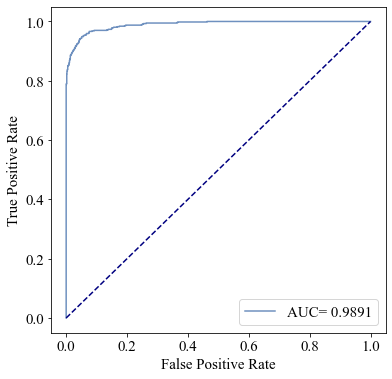

In [115]:
fpr_SVM, tpr_SVM, _ = metrics.roc_curve(Y_test,  y_pred_proba_SVM)

plt.figure(figsize=(6,6))
plt.plot(fpr_SVM,tpr_SVM,label="AUC= "+str(auc_SVM))
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "15"
plt.show()

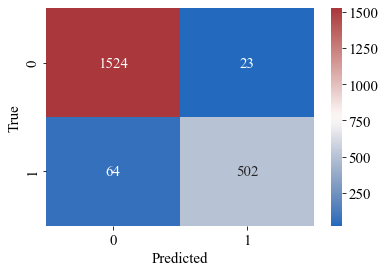

In [126]:
conf_matrix_SVM = confusion_matrix(Y_test, SVM_pred_test_values)
sns.heatmap(conf_matrix_SVM, annot = True, cmap = 'vlag', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "15"

## Naive Bayes

In [69]:
#Stratified 5 folds

mean_accuracy = []
i = 1
kfold = StratifiedKFold(n_splits = 5, random_state=101, shuffle = True)

for train_index, test_index in kfold.split(X_train, Y_train):
    print('\n{} of kfold {}'.format(i, kfold.n_splits))
    xtr, xvl = X_train.iloc[train_index], X_train.iloc[test_index]
    ytr, yvl = Y_train.iloc[train_index], Y_train.iloc[test_index]
    
    nb = GaussianNB()
    nb.fit(xtr, ytr)
    pred_values = nb.predict(xvl)
    score = round(accuracy_score(yvl, pred_values), 4)
    y_pred_proba = nb.predict_proba(xvl)[::, 1]
    auc = round(metrics.roc_auc_score(yvl, y_pred_proba), 4)
    mean_auc.append(auc)
    print('AUC', auc)
    mean_accuracy.append(score)
    print('Accuracy Score', score)
    i += 1
    
print("\nMean Validation Accuracy: ", round((sum(mean_accuracy)/len(mean_accuracy)), 4))
print("\nMean Validation AUC: ", round((sum(mean_auc)/len(mean_auc)), 4))


1 of kfold 5
AUC 0.9854
Accuracy Score 0.9077

2 of kfold 5
AUC 0.9868
Accuracy Score 0.8945

3 of kfold 5
AUC 0.9837
Accuracy Score 0.9037

4 of kfold 5
AUC 0.982
Accuracy Score 0.857

5 of kfold 5
AUC 0.9858
Accuracy Score 0.8763

Mean Validation Accuracy:  0.8878

Mean Validation AUC:  0.9872


In [70]:
nb_pred_test_values = nb.predict(X_test)
score_NB = round(accuracy_score(Y_test, nb_pred_test_values), 4)

y_pred_proba_NB = nb.predict_proba(X_test)[::, 1]

#calculate AUC of model
auc_NB = round(metrics.roc_auc_score(Y_test, y_pred_proba_NB), 4)

#print AUC score
print('AUC', auc_NB)
print('Accuracy Score', score_NB)

AUC 0.9866
Accuracy Score 0.9001


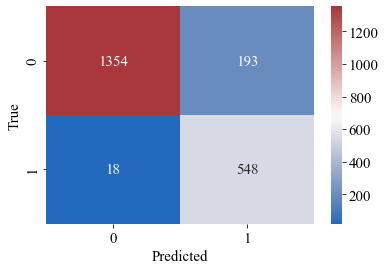

In [128]:
conf_matrix_NB = confusion_matrix(Y_test, nb_pred_test_values)
sns.heatmap(conf_matrix_NB, annot = True, cmap = 'vlag', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "15"

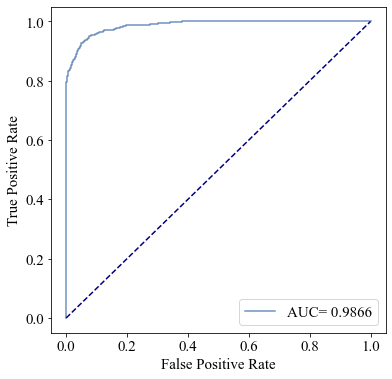

In [116]:
fpr_NB, tpr_NB, _ = metrics.roc_curve(Y_test,  y_pred_proba_NB)

plt.figure(figsize=(6,6))
plt.plot(fpr_NB,tpr_NB,label="AUC= "+str(auc_NB))
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "15"
plt.show()

## Model Results

In [71]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XG Boost', 'SVM', 'Naive Bayes']
accuracy = [score_LR, score_DT, score_RF, score_XGB, score_SVM, score_NB]
auc = [auc_LR, auc_DT, auc_RF, auc_XGB, auc_SVM, auc_NB]
model_results = pd.DataFrame(list(zip(models, accuracy, auc)), columns = ['Model Name', 'Accuracy Score', 'AUC Score'])
model_results

,Model Name,Accuracy Score,AUC Score
0,Logistic Regression,0.9584,0.9909
1,Decision Tree,0.9366,0.9220
2,Random Forest,0.9602,0.9872
3,XG Boost,0.9579,0.9916
4,SVM,0.9588,0.9891
5,Naive Bayes,0.9001,0.9866


# Segmentation

In [72]:
df['CLTV Bins'].unique()

array(['High', 'Average', 'Low', 'Very High'], dtype=object)

In [73]:
conditions = [(df['Churn Score'] >= 60) & ((df['CLTV Bins'] == 'High') | (df['CLTV Bins'] == 'Very High')),
              (df['Churn Score'] >= 60) & ((df['CLTV Bins'] == 'Low') | (df['CLTV Bins'] == 'Average')),
              (df['Churn Score'] < 60)]

values = ['Priority', 'May need to take action soon', 'No need to take action']
df['Customer Category'] = np.select(conditions, values)

df.head()

,Customer ID,Count,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Quarter,...,Churn Score,CLTV,Churn Category,Churn Reason,Age Bins,Tenure Bins,Monthly Charge Bins,Total Charges Bins,CLTV Bins,Customer Category
0,8779-QRDMV,1,Male,78,No,Yes,No,No,0,Q3,...,91,5433,Competitor,Competitor offered more data,Senior Citizen,Low,Low,Low,High,Priority
1,7495-OOKFY,1,Female,74,No,Yes,Yes,Yes,1,Q3,...,69,5302,Competitor,Competitor made better offer,Senior Citizen,Low,High,Low,High,Priority
2,1658-BYGOY,1,Male,71,No,Yes,No,Yes,3,Q3,...,81,3179,Competitor,Competitor made better offer,Senior Citizen,Average,High,Average,Average,May need to take action soon
3,4598-XLKNJ,1,Female,78,No,Yes,Yes,Yes,1,Q3,...,88,5337,Dissatisfaction,Limited range of services,Senior Citizen,Average,High,Average,High,Priority
4,4846-WHAFZ,1,Female,80,No,Yes,Yes,Yes,1,Q3,...,67,2793,Price,Extra data charges,Senior Citizen,High,High,Average,Low,May need to take action soon


Text(0, 0.5, 'Count of Customers')

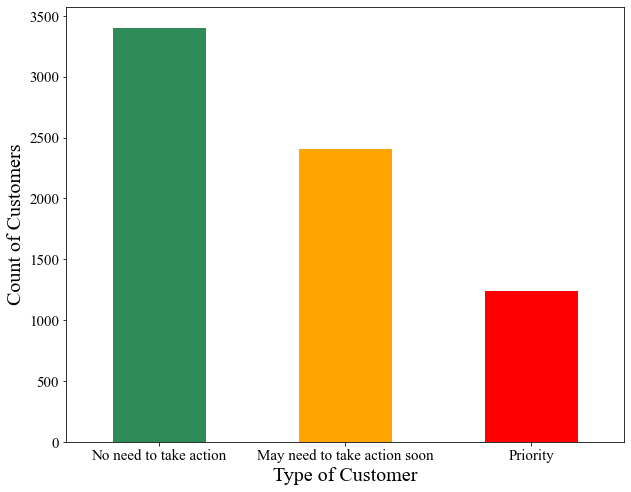

In [138]:
df['Customer Category'].value_counts().plot.bar(figsize = (10, 8), color = ['seagreen', 'orange', 'red'])
plt.xticks(rotation = 360)
plt.xlabel('Type of Customer', size = 20)
plt.ylabel('Count of Customers', size = 20)